# EXPLORING FURTHER RELATIONS OF METRICAL STRENGTH AND PITCH RELATIONS IN TURKISH MAKAM MUSIC 2019
## Francessca Ronchini, Dougal Shakespeare

This research  aims  to  apply  a  three-fold  approach  to  further explore relations of metrical strength in the music of Turkish  Makam:  (1)  assess  the  extent  to  which  findings and conclusions drawn in Holzapfel et al’s work [1] are reproducible on a different data-set, (2) further extend Holzapfelet al’s methodology by exploring correlation relationships across different Makams to observe if any styles of Makam may also act to reinforce or diminish metrical strength, (3) pitch correlation analysis to observe if the makam structure reinforce or dimish the usul metrical structure. 
The dataset used for this work is the **SymbTr** which is a collection machine readable symbolic scores aimed at performing computational studies of Turkish Makam music. 

[1] http://mtg.upf.edu/node/3886

You can download the full pdf score dataset here: https://github.com/MTG/SymbTr-pdf \
You can download the full xml files dataset here: https://github.com/MTG/SymbTr/releases/tag/v2.4.3

In [49]:
from music21 import *
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [50]:
# TODO: change paths to your own dirs
#musescore_path = '/home/dshakes/Desktop/MuseScore-3.4.2-x86_64.AppImage'
xml_path = 'path to MusicXML dir'
pdf_path = 'path to SymbTr-pdf dir'
#musescore_path = 'path to musescore'

In [51]:
# Config Muse Score
#us = environment.UserSettings()
#us.create()
#us['musicxmlPath'] = musescore_path # Path to MuseScore3.exe
#us['ipythonShowFormat'] = 'musicxml'

## Pre-processing and Balancing of Data

We will not work on the full dataset in order to have balance data.  
For this reason, we will select only a subset of the usul and makam available. In particular, we will select the most popular usul based on value count.  
Once we have decided which usul when want to work on, we will select only makam which share all the usul which has been selected. 

In [52]:
#getting all the list of the different makam and usul used for each pdf file
usul = []
makam = []
for makam_file in os.listdir(pdf_path):
    if makam_file[-3:] == 'pdf':
        usul.append(makam_file.split('--')[2])
        makam.append(makam_file.split('--')[0])

In [53]:
#value count of different usul
pd.Series(usul).value_counts()

aksak            319
sofyan           293
duyek            278
aksaksemai       128
curcuna          111
                ... 
14_4               1
devrituran_ii      1
nimsakil           1
bulgardarbi        1
devrisureyya       1
Length: 88, dtype: int64

As we can see, the most popolar usul in the dataset are:
* aksak
* sofyan 
* duyek 
* aksaksemai
* curcuna 

Anyway, we have been not able to retrieve the weigths of düm, tek and ke for the aksaksemai usul, we decided to discart it and focused the research on aksak, sofyan, duyek and curcuna. 

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    a = pd.Series(usul).value_counts()

In [55]:
# Output makam / ursul distribution for all ursuls which have > 5 occurances in a makam
makams = pd.DataFrame(np.array([usul, makam]).T, columns=['usul', 'makam'])
makamsdf = makams.groupby(['makam', 'usul']).filter(lambda x: len(x) > 5)
makamsdf = makamsdf.groupby(['makam', 'usul'])['makam'].count() 

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(makamsdf)

makam            usul       
acemasiran       agiraksak       7
                 aksak           9
                 duyek           7
acemkurdi        aksak           6
beyati           agiraksak       7
                 aksak           7
                 aksaksemai      7
                 duyek          11
buselik          duyek          10
                 sofyan          6
evic             aksak           8
gerdaniye        sofyan          8
hicaz            agiraksak      12
                 aksak          26
                 curcuna         9
                 duyek          19
                 nimsofyan      12
                 semai           8
                 senginsemai     6
                 sofyan         20
                 turkaksagi      8
hicaz_humayun    sofyan          6
hicazkar         aksak          11
                 devrihindi      8
                 duyek          15
                 sofyan          7
huseyni          agiraksak       6
                 aksak    

In the next step, only the makam which share all the four usul will be selected from the dataset and the research will be focused on those makams. 

In [56]:
high_pop_usuls = ['aksak', 'sofyan', 'duyek', 'curcuna'] #select 4 most popular ursuls for meaningful analysis
filtered_makams = makams.loc[makams['usul'].isin(high_pop_usuls)] #select makams which contain those usul
filtered_makams = filtered_makams.groupby(['makam', 'usul']).filter(lambda x: len(x) > 3) #remove usul occurances with <= 3
df = pd.DataFrame({'count' : filtered_makams.groupby( [ "makam", "usul"] ).size()}).reset_index()

# remove all makams which do not appear in all 4 usuls
vc = df['makam'].value_counts()
vc = vc[vc == 4].index
df = df.loc[df['makam'].isin(vc)]

# output chosen makams and usul counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

       makam     usul  count
15     hicaz    aksak     26
16     hicaz  curcuna      9
17     hicaz    duyek     19
18     hicaz   sofyan     20
20  hicazkar    aksak     11
21  hicazkar  curcuna      4
22  hicazkar    duyek     15
23  hicazkar   sofyan      7
25   huseyni    aksak     15
26   huseyni  curcuna      7
27   huseyni    duyek      7
28   huseyni   sofyan     17
29    huzzam    aksak     21
30    huzzam  curcuna     11
31    huzzam    duyek     16
32    huzzam   sofyan      5
40     mahur    aksak     18
41     mahur  curcuna      4
42     mahur    duyek     16
43     mahur   sofyan     10
44  muhayyer    aksak     12
45  muhayyer  curcuna      5
46  muhayyer    duyek      6
47  muhayyer   sofyan     12
50  nihavent    aksak     15
51  nihavent  curcuna      7
52  nihavent    duyek     24
53  nihavent   sofyan     17
56      rast    aksak      7
57      rast  curcuna      9
58      rast    duyek     18
59      rast   sofyan     15
63     segah    aksak     18
64     segah  

We consider only makams which shared the same four usul selected.

In [57]:
#makams that will be considered for this research
makam_considered = df.makam.unique()
print("Makam considered for the research: {}".format(makam_considered))

Makam considered for the research: ['hicaz' 'hicazkar' 'huseyni' 'huzzam' 'mahur' 'muhayyer' 'nihavent'
 'rast' 'segah' 'ussak']


## Hard Coded Usul Weights

All weights for the usul we considered are already defined in the following paper which we consider as a baseline [1]. In this paper, the weighted metrical distribution are taken form the Mus2okr software [2].
We consider the same weigths for our research.

[1] http://mtg.upf.edu/node/3886 
[2] http://www.musiki.org/

In [58]:
#weigths_dictionary
weights = {
    "aksak": [3, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0],
    "sofyan": [3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0], 
    "duyek": [2, 0, 3, 0, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 0],
    "curcuna": [3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0]
}


# meter for usul
usul_tempo = {
    "aksak": [9, 8], 
    "sofyan": [4, 4], 
    "duyek": [8, 8], 
    "curcuna": [10, 8]
}

#creating a dictionary to save bins needed to plot the histogram for every usul
usul_bins = {}
for usul in usul_tempo:
    y_bins = (16/usul_tempo[usul][1]) * usul_tempo[usul][0]
    usul_bins[usul] = int(y_bins)

Let's plot and see how the weights distribution looks like for each usul.

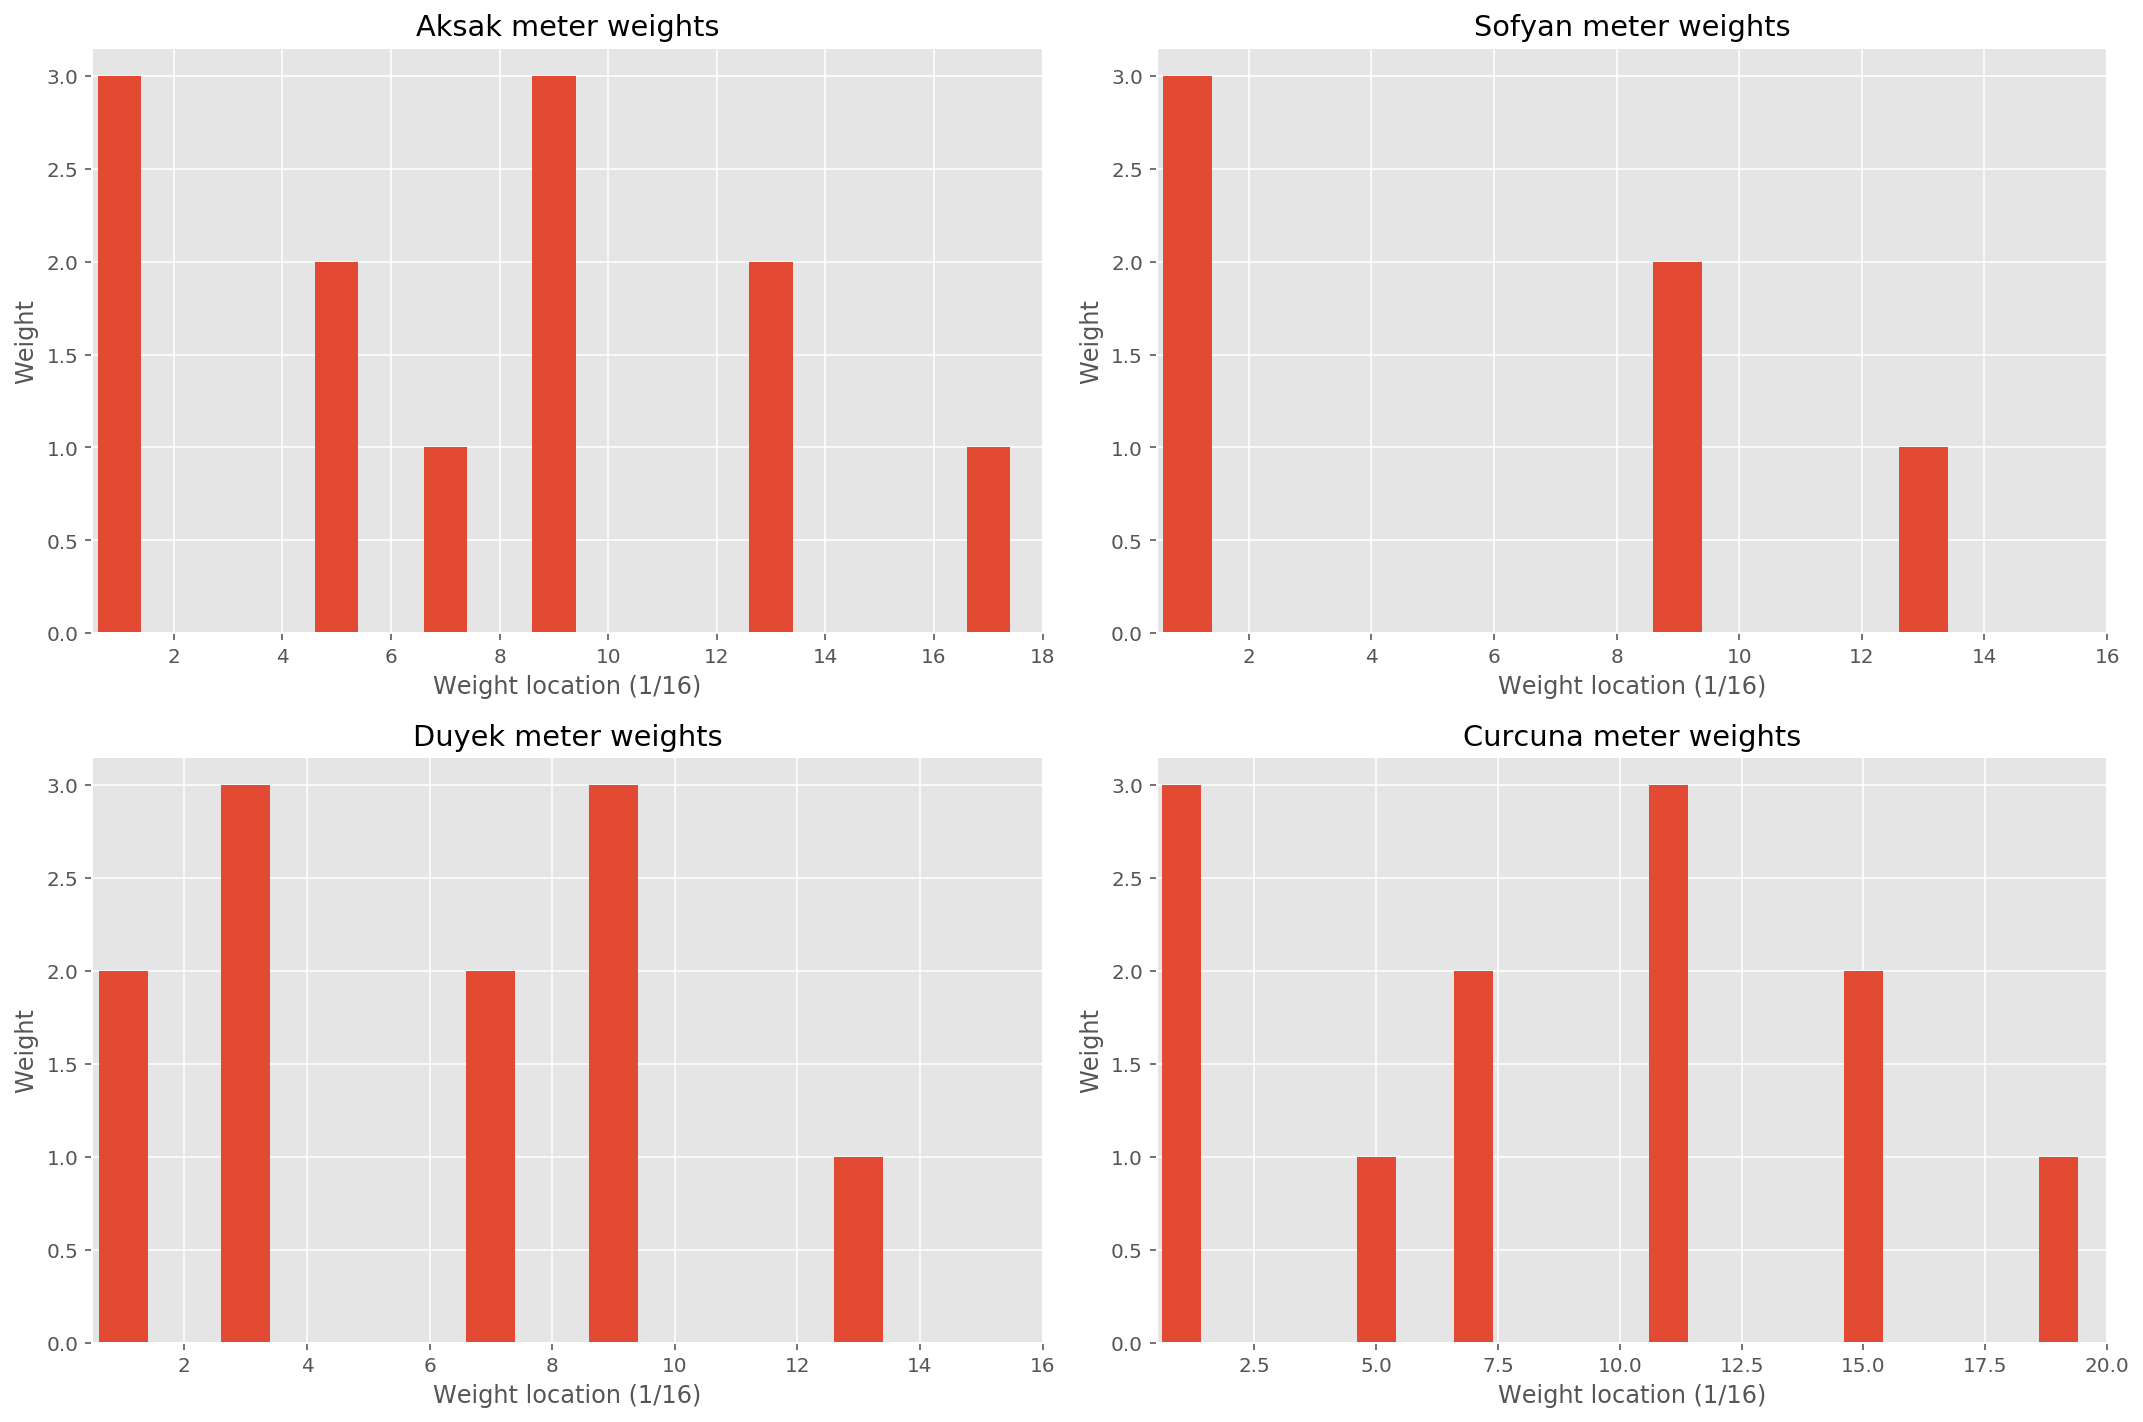

In [59]:
#plotting weigths for each usul
plt.style.use('ggplot')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(15)


#create plot
# usul aksak
ax1.bar(np.arange(1, usul_bins["aksak"]+1, dtype=int), weights["aksak"])
ax1.set_xlabel("Weight location (1/16)")
ax1.set_xlim(0.5, usul_bins["aksak"])
ax1.set_ylabel("Weight")
ax1.set_title('Aksak meter weights')

#usul sofyan
ax2.bar(np.arange(1, usul_bins["sofyan"]+1, dtype=int), weights["sofyan"])
ax2.set_xlabel("Weight location (1/16)")
ax2.set_xlim(0.5, usul_bins["sofyan"])
ax2.set_ylabel("Weight")
ax2.set_title('Sofyan meter weights')

#usul duyek
ax3.bar(np.arange(1, usul_bins["duyek"]+1, dtype=int), weights["duyek"])
ax3.set_xlabel("Weight location (1/16)")
ax3.set_xlim(0.5, usul_bins["duyek"])
ax3.set_ylabel("Weight")
ax3.set_title('Duyek meter weights')
 
#usul curcuna
ax4.bar(np.arange(1, usul_bins["curcuna"]+1, dtype=int), weights["curcuna"])
ax4.set_xlabel("Weight location (1/16)")
ax4.set_xlim(0.5, usul_bins["curcuna"])
ax4.set_ylabel("Weight")
ax4.set_title('Curcuna meter weights')
 
#Create names on the x-axis
#plt.xticks(y_pos, bars)
 
#Show graphic
plt.tight_layout()
plt.show()

## Working with makam scores
Most of makam scores have non standard key signatures, and this might cause problems. We will show you an example of this problema and a work around we will apply to all the xml file we will process, in order to be able to work with MusicXML files.

Music21 was not developed with makam music in mind, and many of the accidentals used in makam music are not recognized by music21.

In [60]:
# path to test xml file
makamScore = xml_path + 'acemasiran--nakis--yuruksemai--ne_hevayi--dede_efendi.xml'

music21 doesn't accept double-slash-flat as accidental
music21 doesn't accept slash-flat as accidental
music21 doesn't accept slash-quarter-sharp as accidental
music21 doesn't accept slash-sharp as accidental
done


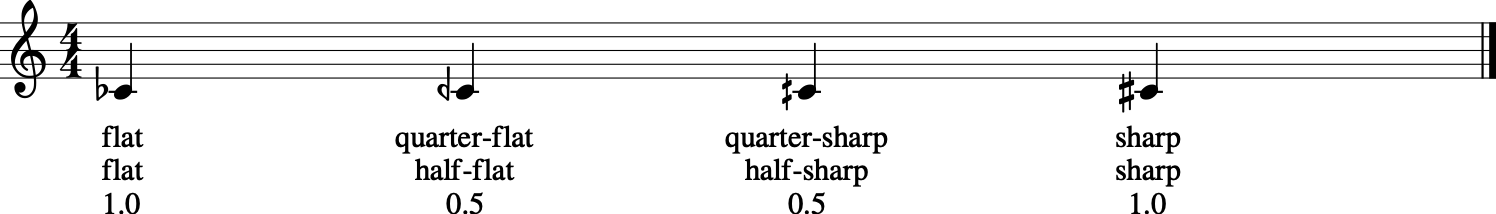

In [61]:
# these are the names of all the accidentals used in makam scores, as contained in the MusicXML files
makamAccidentals = ['double-slash-flat', 'flat', 'slash-flat', 'quarter-flat', 'quarter-sharp', 'sharp', 'slash-quarter-sharp', 'slash-sharp']

# create a stream to contained altered notes
makamNotes = stream.Stream()

for i in range(len(makamAccidentals)): # create a note per accidental
    try:
        n = note.Note()
        n.pitch.accidental = makamAccidentals[i] # add one accidental from the list
        n.addLyric(makamAccidentals[i], applyRaw=True) # add the name of the accidental as lyric
        n.addLyric(n.pitch.accidental.name, applyRaw=True) # add the name used by music21 as lyric
        n.addLyric(n.pitch.accidental.alter) # add the number of semitones of the accidental as lyric
        makamNotes.append(n)
    except:
        print("music21 doesn't accept {} as accidental".format(makamAccidentals[i]))

print('done')
makamNotes.show()

Since the problem when loading the score with music21 is the non standard key signature, one solution might be to manipulate the MusicXML file to get rid of the time signature.
<br/>
We use ElementTree to find it.

In [62]:
import xml.etree.ElementTree as ET

tree = ET.parse(makamScore)
root = tree.getroot()   

notes = []
accidentals = []
alter = []

for k in root.iter('key'):
    for ks in k.findall('key-step'):
        notes.append(ks.text)
    for ka in k.findall('key-accidental'):
        accidentals.append(ka.text)
    for kalt in k.findall('key-alter'):
        alter.append(kalt.text)

print('The key signature of this score has:')
for i in range(len(notes)):
    print('-', notes[i], accidentals[i])

The key signature of this score has:
- B flat


Now we can remove it from the MusicXML file and create a new file without key signature

In [63]:
for k in root.iter('key'):
    print(k)
    for ks in k.findall('key-step'):
        k.remove(ks)
    for ka in k.findall('key-accidental'):
        k.remove(ka)
    for kalt in k.findall('key-alter'):
        k.remove(kalt)

newMakamScore = makamScore[:-4] + '-withoutKeySignature.xml'
print(newMakamScore)

tree.write(newMakamScore)

<Element 'key' at 0x1aa62ce410>
/Users/francescaronchini/repo/makam_project/makam/MusicXML_research/acemasiran--nakis--yuruksemai--ne_hevayi--dede_efendi-withoutKeySignature.xml


And now, music21 will load the score

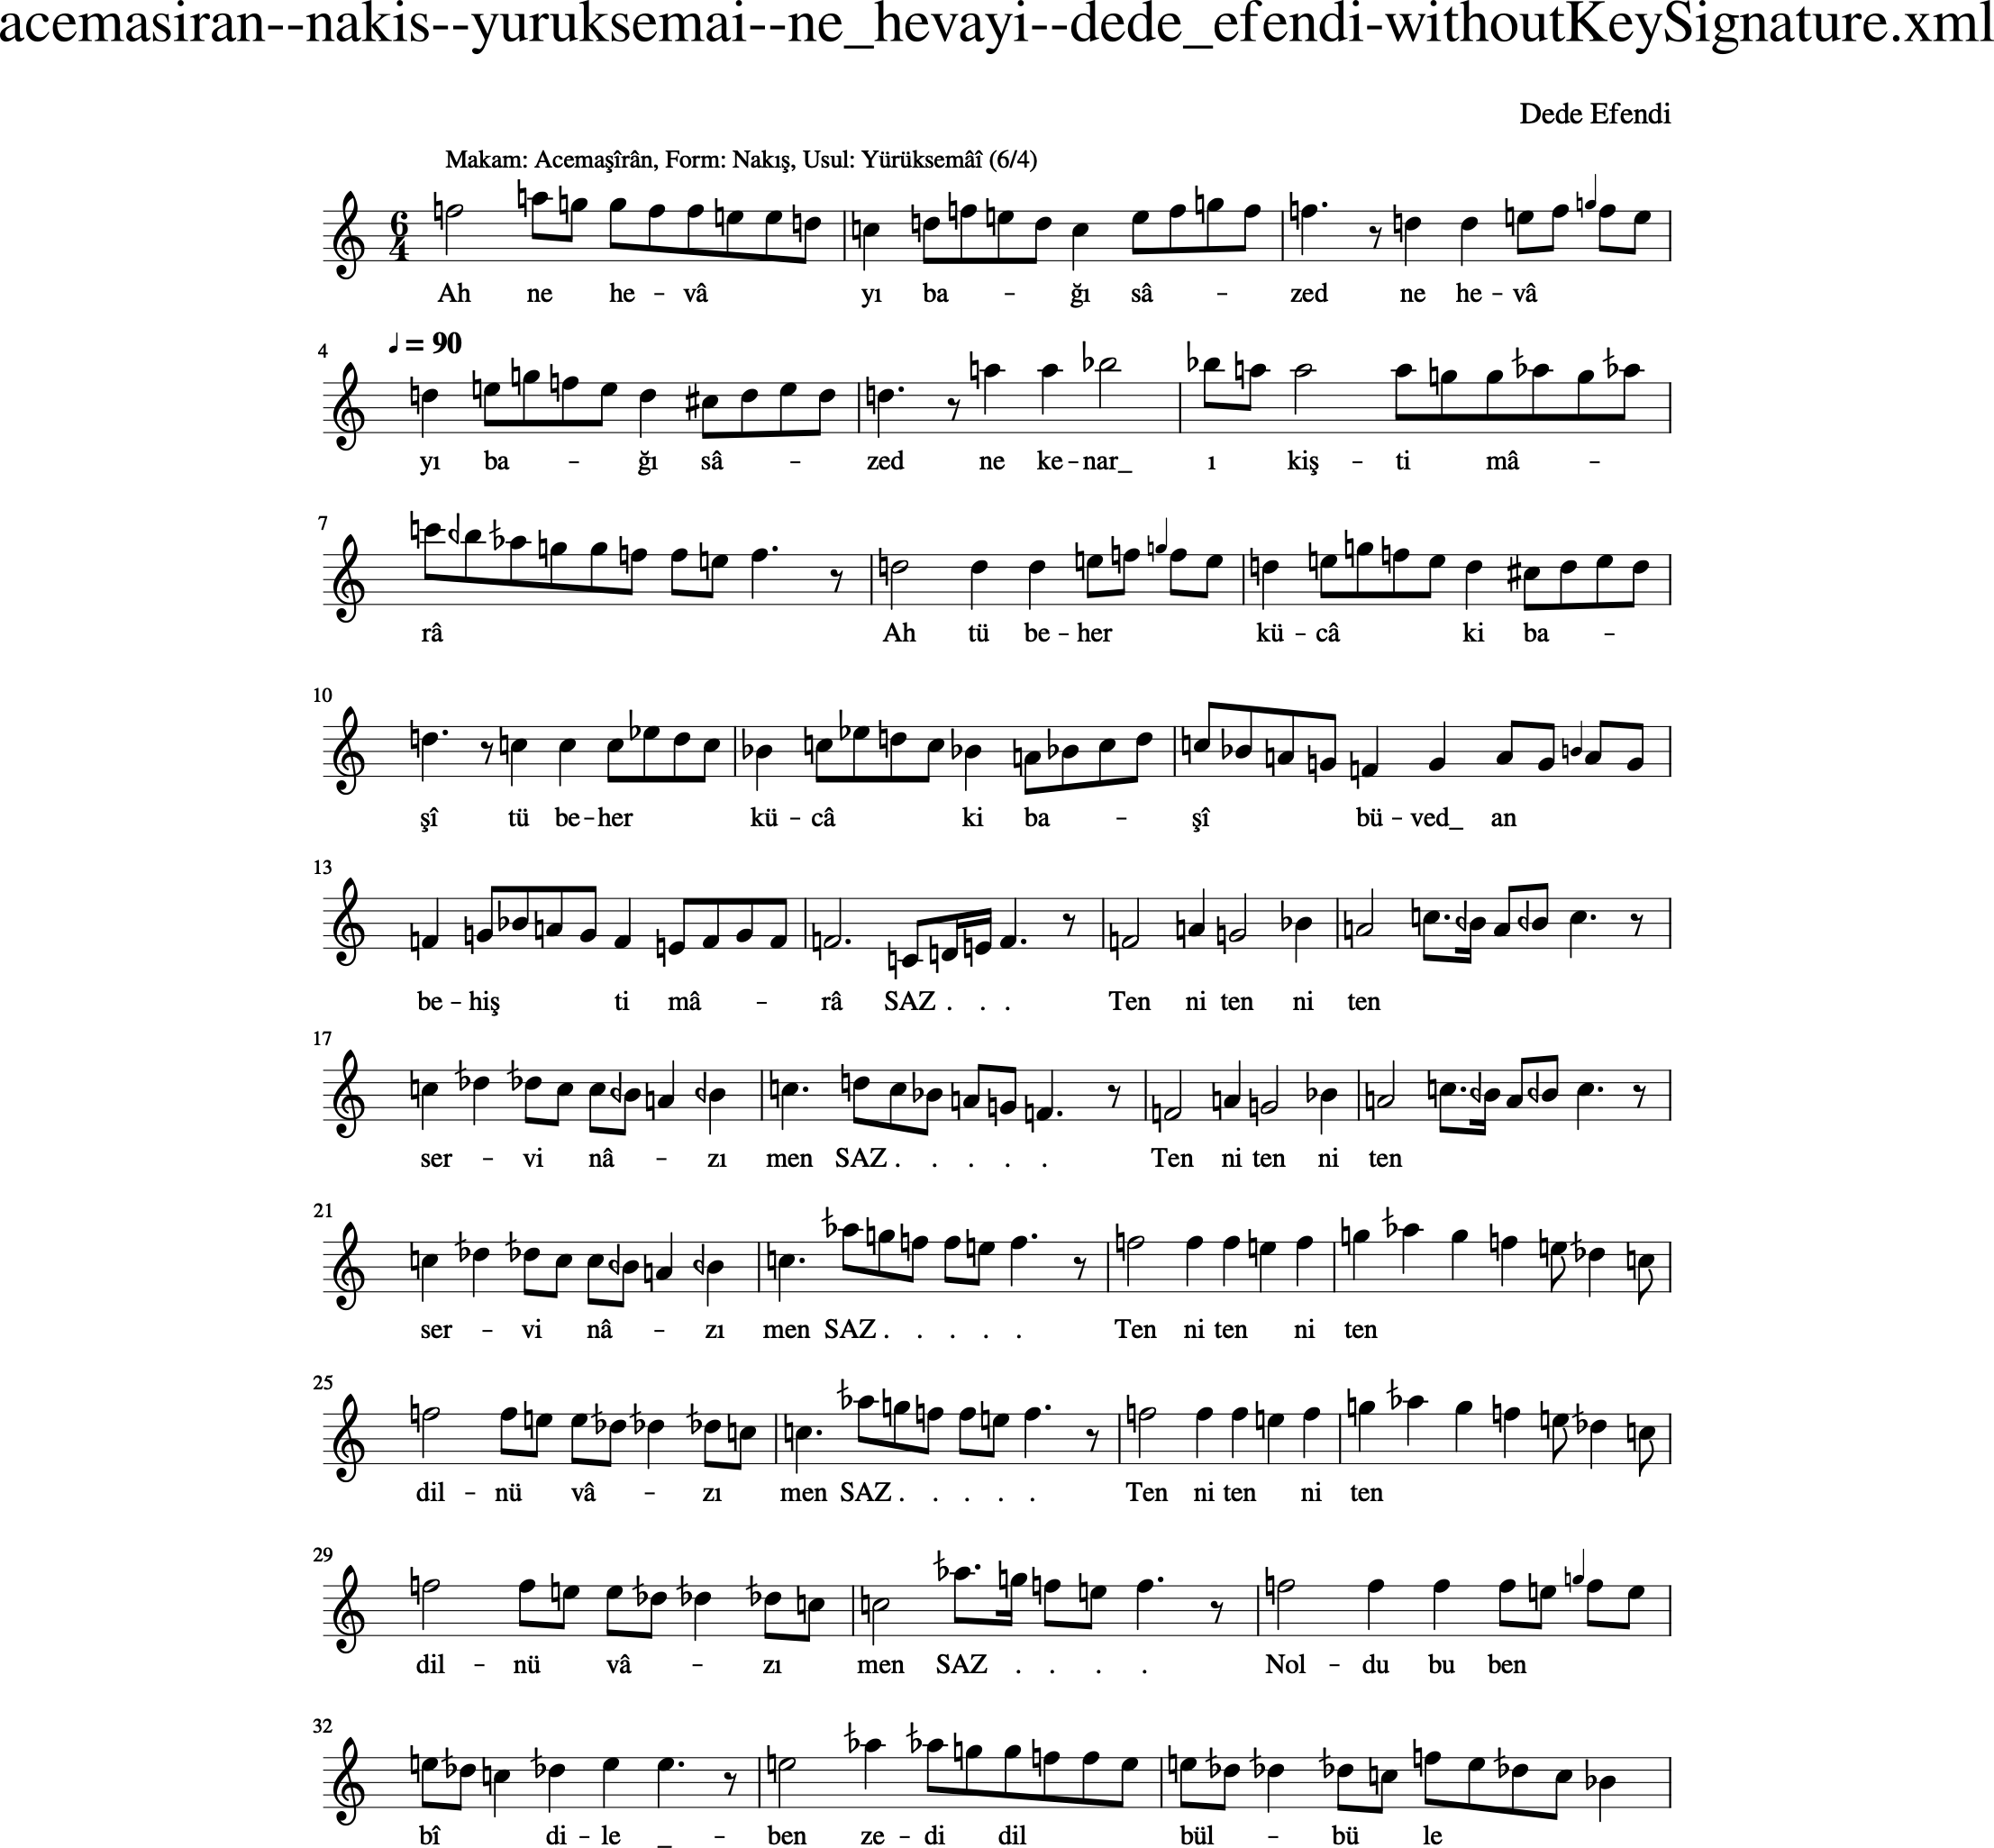

In [64]:
s = converter.parse(newMakamScore)
s.show()

## Pre-processing all the file

Now that we have seen how it works with one score, we will go through all the scores, applying the work around we have just seen to remove accidentals to all of them, to be able to work with MusicXML. 
We will also remove scores which contain more than a time siganture per score and score which time signature is different compared to the usul time signature considered on this research. 


In [65]:
def check_time_signature(usul, new_path):
    '''
    The function checks if the time signature of the current score is inline with the time signature declared
    for the usul considered.
    Input:
    --------
    :usul: usul considered
    :new_path = path of the score considered
    Output:
    --------
    return 0, the file can be keep
    return 1: the file need to be removed, either for different time signature or multiple time siganture
    '''
    s = converter.parse(new_path) 
    p = s.parts # taking the first part of the score which contain the time signature information
    tS = p.flat.getElementsByClass(meter.TimeSignature).stream()
    #only scores with only 1 signature
    if len(tS) == 1:
        score_time = [tS[0].numerator, tS[0].denominator]
        if score_time != usul_tempo[usul]:
            #different meter
            return 1         
    else:
        #more than a key siganture in the score
        return 1 
    
    return 0

In [66]:
makam_out_folder_path = 'path to processed score dir (where you want to save the processed scores)'


if not os.path.exists(makam_out_folder_path):
    os.makedirs(makam_out_folder_path)

def remove_accidentals(makam_score):
    '''
    The function removes all the accidentals from the score.
    Input:
    -------
    :makam_score: path of the makam score
    '''
    
    tree = ET.parse(makam_score)
    root = tree.getroot() 
    
    for k in root.iter('key'):
        print(k)
    for ks in k.findall('key-step'):
        k.remove(ks)
    for ka in k.findall('key-accidental'):
        k.remove(ka)
    for kalt in k.findall('key-alter'):
        k.remove(kalt)
        
    makam_score = makam_score.split('/')[-1]
    new_Makam_Score = makam_out_folder_path + makam_score[:-4] + '-withoutKeySignature.xml'
    tree.write(new_Makam_Score)
     
    return new_Makam_Score

In [67]:
usul_considered = high_pop_usuls
makam_init_folder_path = xml_path

makam_count_before = 0
makam_count_noaccidentals = 0
makam_count_different_time = 0 
counter = 0

#loop through the makam dataset
for makam_file in os.listdir(makam_init_folder_path):
    #for mac and .DS_store file
    if not makam_file.startswith('.'):
        usul = makam_file.split('--')[2]
        makam = makam_file.split('--')[0]
        counter = counter + 1
        
        #if the score refers to one of the usul considered and one the makam considered
        if usul in usul_considered and makam in makam_considered:  
            makam_count_before = makam_count_before + 1
            #remove accidentals
            path_score = makam_init_folder_path + makam_file
            new_path = remove_accidentals(path_score)
            
            #check time signature for the current xml
            different_time = check_time_signature(usul, new_path)
            if different_time:
                print("The file {} will be removed for different time signature".format(new_path))
                os.remove(new_path)
                makam_count_different_time = makam_count_different_time + 1            

<Element 'key' at 0x1aa7d03950>
<Element 'key' at 0x1aa54edfb0>
<Element 'key' at 0x1aa39d5b30>
<Element 'key' at 0x1aa5885050>
<Element 'key' at 0x1aa5519770>
<Element 'key' at 0x1aa739b170>
<Element 'key' at 0x1027f1650>
<Element 'key' at 0x1aa79fa4d0>
<Element 'key' at 0x1aa7352dd0>
<Element 'key' at 0xa193fc3b0>
<Element 'key' at 0xa18736e90>
<Element 'key' at 0x1aa7a60170>
<Element 'key' at 0xa17b27dd0>
<Element 'key' at 0xa177395f0>
<Element 'key' at 0x1aa708c710>
<Element 'key' at 0xa176d5590>
<Element 'key' at 0x1aa71375f0>
<Element 'key' at 0x1aa7567290>
<Element 'key' at 0xa18746a70>
<Element 'key' at 0xa19414c50>
<Element 'key' at 0x1aa71e98f0>
<Element 'key' at 0xa16f88290>
<Element 'key' at 0xa176c6410>
<Element 'key' at 0xa19453710>
<Element 'key' at 0x10281b650>
<Element 'key' at 0x1aa73a24d0>
<Element 'key' at 0xa187615f0>
<Element 'key' at 0x1027eb650>
<Element 'key' at 0xa17ab0cb0>
<Element 'key' at 0x1aa199d7d0>
<Element 'key' at 0x1027cd050>
<Element 'key' at 0x1aa7

<Element 'key' at 0x1aa75a1710>
<Element 'key' at 0xa176ae350>
<Element 'key' at 0x1aa5123530>
<Element 'key' at 0x1aa7524950>
<Element 'key' at 0x1aa7296170>
<Element 'key' at 0xa1773dad0>
<Element 'key' at 0x1aa7adf830>
<Element 'key' at 0xa17acdcb0>
<Element 'key' at 0x1aa7158ef0>
<Element 'key' at 0xa17746770>
<Element 'key' at 0xa1873ccb0>
<Element 'key' at 0x1aa75c4890>
<Element 'key' at 0xa176cea70>
<Element 'key' at 0x1027f8590>
<Element 'key' at 0xa17a96230>
<Element 'key' at 0x1028286b0>
<Element 'key' at 0xa1766ab30>
<Element 'key' at 0x1aa4c7f530>
<Element 'key' at 0x1a9efead70>
<Element 'key' at 0xa19b881d0>
<Element 'key' at 0xa1986cc50>
<Element 'key' at 0xa1774b5f0>
<Element 'key' at 0x1aa7528d70>
<Element 'key' at 0x1aa75bfad0>
<Element 'key' at 0x1aa7198050>
<Element 'key' at 0xa19544890>
<Element 'key' at 0x1aa75a44d0>
<Element 'key' at 0x1aa7129ef0>
<Element 'key' at 0xa18761830>
<Element 'key' at 0x1aa72e28f0>
<Element 'key' at 0xa19444950>
<Element 'key' at 0x1027

<Element 'key' at 0x1aa737b050>
<Element 'key' at 0x1aa75a7950>
<Element 'key' at 0xa19b88c50>
<Element 'key' at 0x1027f1a10>
<Element 'key' at 0x1aa0713cb0>
<Element 'key' at 0xa1775f8f0>
<Element 'key' at 0x1aa785b5f0>
<Element 'key' at 0xa176e2350>
<Element 'key' at 0xa1983a230>
<Element 'key' at 0x1aa7355290>
<Element 'key' at 0x1aa75a4590>
<Element 'key' at 0x1aa7a1eb30>
The file ../makam/MusicXML_noaccidentals/muhayyer--kupe--duyek--nideyim--ahmet_avni_konuk-withoutKeySignature.xml will be removed for different time signature
<Element 'key' at 0x102767e90>
<Element 'key' at 0xa17b1e410>
<Element 'key' at 0x1aa7245ef0>
<Element 'key' at 0x1aa7108d10>
<Element 'key' at 0xa176eb650>
<Element 'key' at 0x1aa78fc530>
<Element 'key' at 0x1aa775d0b0>
<Element 'key' at 0x1aa72b3f50>
<Element 'key' at 0xa1875e410>
<Element 'key' at 0x1aa71c86b0>
<Element 'key' at 0x1aa7bed2f0>
<Element 'key' at 0x1aa2bff650>
<Element 'key' at 0x1aa74b3710>
<Element 'key' at 0xa16e999b0>
<Element 'key' at 0

In [68]:
print("Total number of makams in the dataset {}".format(counter))

Total number of makams in the dataset 2201


We only analyzed makams between ['hicaz' 'hicazkar' 'huseyni' 'huzzam' 'mahur' 'muhayyer' 'nihavent'
 'rast' 'segah' 'ussak'] and usul ['aksak', 'sofyan', 'duyek', 'curcuna']. 

In [69]:
print("We analyzed {} makams but we kept only {} for time signature".format(makam_count_before, (makam_count_before-makam_count_different_time)))

We analyzed 508 makams but we kept only 486 for time signature


### Scaling to k 
Definition of function we will need to scale the bin according to the different usul metric. 

In [70]:
#scale note ditribution to k (bin of the usul)
def scale_to_k(OldMin, OldMax, OldValue, k):
    '''
    The function scales note ditribution to k (bin of the usul considered)
    Input:
    -------
    :oldMin: previous minimum for old value
    :OldMax: previous maximum for old value
    :OldValue: previous value to scale to new value
    :k: usul bins
    Return:
    --------
    :newValue: value scaled
    '''
    
    NewMin = 0
    NewMax = k 
    
    NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    return NewValue

In [71]:
# function to calc measure seperation discarding measures which are glissandos
def calc_measure_length(m1, m2, measures):
    '''
    The function calculates measure seperation discarding measures which are glissandos
    Input:
    -------
    :m1: first measure
    :m2: second measure
    :measures: measures
    Return:
    --------
    distance between measures
    '''
    if isinstance(measures[m1], m21.spanner.Glissando):
        # shift m1 and m2
        m1+=1
        m2+=1
        return calc_measure_length(m1,m2,measures)
    if isinstance(measures[m2], m21.spanner.Glissando):
        m2+=1
        return calc_measure_length(m1,m2,measures)
    else: return measures[m2].offset - measures[m1].offset

## Analysis of dataset: note distributiona and pitch correlation

We will first declare all the functions and variable we need to do the analyze note distribution and pitch correlation. Then we will perform the analysis of the dataset. 

In [72]:
#counting how many beat there are per usul and note definition 
from collections import defaultdict

#note considered for the pitch correlation task considerng only tone
note_considered = {
    'C': 0,
    'D': 1,
    'E': 2,
    'F': 3, 
    'G': 4,
    'A': 5, 
    'B': 6
}

octaves = np.arange(7)
usul_weights_bins = defaultdict(dict)

for usul in usul_bins.keys():
    for o in octaves:
        usul_weights_bins[usul][o] = np.zeros(shape = (len(weights[usul]), len(note_considered)), dtype=int)
        



In [73]:
#check if a bin is a weigth bin in the usul considered
def check_bin(usul, bin_value):
    '''
    The function checks if a bin is a weigthed bin in the usul considered
    Input:
    -------
    :usul: usul considered
    :bin_value: bin to check
    Return:
    --------
    return 1: the bin is a weighted bin
    return 0: the bin is not a weighted bin
    '''
    return weights[usul][bin_value] != 0

In [74]:
import music21 as m21

df_makam_bin_vals = pd.DataFrame(columns=['usul', 'makam', 'bin_vals', 'file_path'])


def analyse_note_dist(k, makam, usul, scoreParts, makam_score):
    '''
    The function analyses the distance between notes
    Input:
    -------
    :k: usul bin
    :makam: makam considered
    :scoreParts: parts of the score
    :makam_score: makam score path
    '''
    
    note_offsets = np.array([])
    meter_bins = np.zeros(k)
    measures0 = scoreParts[0].elements[1:]

    beats_in_bar = calc_measure_length(1,2,measures0)
    

    for m in measures0:
        
        if isinstance(m, m21.spanner.Glissando) == False:
            
            for n1 in m.elements: 
                # only consider notes, not rests, time sigs ect.
                if isinstance(n1, m21.note.Note):
                    #offset of the note
                    note_offset = n1.offset
                    note_offsets = np.append(note_offsets, note_offset)
                    #scaling to bins distribution of usul
                    scaled_offset = scale_to_k(0, beats_in_bar, note_offset, k)
                    bin_val = math.floor(scaled_offset)
                    if check_bin(usul, bin_val):
                        #it is a weigth bin, we it will considered for pitch correlation
                        pitch = note_considered[n1.pitch.step]
                        octave = n1.octave
                        usul_weights_bins[usul][octave][bin_val][pitch] += 1
                    meter_bins[bin_val] += 1
        else: 
            print(makam_score)
            print('glissando found:', m)
    
    # add row to df
    df_makam_bin_vals.loc[len(df_makam_bin_vals)] = [usul, makam, meter_bins, makam_score]

In [75]:
counter = 0

for makam_score in os.listdir(makam_out_folder_path):
    usul = makam_score.split('--')[2]
    makam = makam_score.split('--')[0]
    
    k = usul_bins[usul] #value to scale to
    makam_path = makam_out_folder_path + makam_score
    counter = counter + 1 
        
    s = converter.parse(makam_path)
    scoreParts = s.parts.stream()
                
    analyse_note_dist(k, makam, usul, scoreParts, makam_score)
    
       

huzzam--sarki--aksak--zamani_var_ki--klarnet_ibrahim_efendi-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note G><music21.note.Note C>>
huzzam--sarki--aksak--zamani_var_ki--klarnet_ibrahim_efendi-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note G><music21.note.Note C>>
huzzam--sarki--aksak--zamani_var_ki--klarnet_ibrahim_efendi-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note G><music21.note.Note C>>
huzzam--sarki--aksak--zamani_var_ki--klarnet_ibrahim_efendi-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note G><music21.note.Note C>>
hicaz--sarki--duyek--artik_bu--alaeddin_yavasca-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note F#><music21.note.Note A>>
hicaz--sarki--duyek--artik_bu--alaeddin_yavasca-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note F#><music21.note

mahur--sarki--sofyan--ne_dogan--munir_nurettin_selcuk-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note D><music21.note.Note G>>
mahur--sarki--sofyan--ne_dogan--munir_nurettin_selcuk-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note E><music21.note.Note F>>
mahur--sarki--sofyan--ne_dogan--munir_nurettin_selcuk-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note F#><music21.note.Note E>>
mahur--sarki--sofyan--ne_dogan--munir_nurettin_selcuk-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note F#><music21.note.Note E>>
segah--turku--sofyan--pancar_pezik--hacibektas-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note A><music21.note.Note G>>
segah--turku--sofyan--pancar_pezik--hacibektas-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note G><music21.note.Note F~>>
segah--turku--s

mahur--mars--sofyan--gafil_ne--muallim_ismail_hakki_bey-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note E><music21.note.Note F>>
mahur--mars--sofyan--gafil_ne--muallim_ismail_hakki_bey-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note C><music21.note.Note E>>
mahur--mars--sofyan--gafil_ne--muallim_ismail_hakki_bey-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note B><music21.note.Note D>>
mahur--mars--sofyan--gafil_ne--muallim_ismail_hakki_bey-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note E><music21.note.Note F>>
mahur--mars--sofyan--gafil_ne--muallim_ismail_hakki_bey-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note C><music21.note.Note E>>
mahur--mars--sofyan--gafil_ne--muallim_ismail_hakki_bey-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note B><music21.note.N

## Pitch correlation

In the next step, we will gather information related to which note and which octave as been played for each weighted bin. 

In [76]:
from operator import itemgetter
from heapq import nlargest

# Analyse the top 3 pitchs for each bin (across all octaves)

notes = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
usul_pitch_bins_dfs = {} # collection of all df for pitch/bin info for all usuls

for usul in usul_considered:
    print('---------------------------')
    print("Usul:", usul)
    
    df_data = {'bin' : [], 'note' : [], 'octave' : [], 'count' : []} # reset df

    # for every bin...
    for i in range(len(weights[usul])):
        # init new variable to append max vals to
        max_vals_list = []
        
        print('\nBIN:', i)
        non_zero = False
        max_val = 0
        max_octave = 0
        for o in octaves:
            bin_array = usul_weights_bins[usul][o][i]
            print('octave {}: {}'.format(o, bin_array))
        
            if np.sum(bin_array) != 0:
                largest3 = nlargest(3, enumerate(bin_array), key=lambda x: x[1])
                largest3 = [x[::-1] for x in largest3] #reverse list to get value first
                # append octave also to tuple
                max_vals = [list(tup)+[o] for tup in largest3]
                max_vals_list += max_vals
                  
                index_max = np.where(bin_array == np.max(bin_array))
                max_val = np.max(bin_array)
                non_zero = True # flag to consider if at least one octave has value counts in
        
        if non_zero:
            for max_note in nlargest(3,max_vals_list):
                # returns [note_counts, index, octave] for top 3 note counts
                df_data['bin'].append(i)
                df_data['note'].append(notes[max_note[1]])
                df_data['octave'].append(max_note[2])
                df_data['count'].append(max_note[0])
    
    usul_pitch_bins_dfs[usul] = pd.DataFrame.from_dict(df_data)

---------------------------
Usul: aksak

BIN: 0
octave 0: [0 0 0 0 0 0 0]
octave 1: [0 0 0 0 0 0 0]
octave 2: [0 0 0 0 0 0 0]
octave 3: [0 0 0 0 0 0 0]
octave 4: [  0   8   2  21 457 591 599]
octave 5: [ 709 1467  744  569  853  343  117]
octave 6: [66  8  0  0  0  0  0]

BIN: 1
octave 0: [0 0 0 0 0 0 0]
octave 1: [0 0 0 0 0 0 0]
octave 2: [0 0 0 0 0 0 0]
octave 3: [0 0 0 0 0 0 0]
octave 4: [0 0 0 0 0 0 0]
octave 5: [0 0 0 0 0 0 0]
octave 6: [0 0 0 0 0 0 0]

BIN: 2
octave 0: [0 0 0 0 0 0 0]
octave 1: [0 0 0 0 0 0 0]
octave 2: [0 0 0 0 0 0 0]
octave 3: [0 0 0 0 0 0 0]
octave 4: [0 0 0 0 0 0 0]
octave 5: [0 0 0 0 0 0 0]
octave 6: [0 0 0 0 0 0 0]

BIN: 3
octave 0: [0 0 0 0 0 0 0]
octave 1: [0 0 0 0 0 0 0]
octave 2: [0 0 0 0 0 0 0]
octave 3: [0 0 0 0 0 0 0]
octave 4: [0 0 0 0 0 0 0]
octave 5: [0 0 0 0 0 0 0]
octave 6: [0 0 0 0 0 0 0]

BIN: 4
octave 0: [0 0 0 0 0 0 0]
octave 1: [0 0 0 0 0 0 0]
octave 2: [0 0 0 0 0 0 0]
octave 3: [0 0 0 0 0 0 0]
octave 4: [  0   5  14  56 169 283 644]
octave

Now that we know which note and which octave as been played for each weighted bin, we can have a look at which are the most played for each weigthed bin. We will considered only the 3 most popular ones. 

In [77]:
#pitch correlation for usul aksak
usul_pitch_bins_dfs['aksak']

,bin,note,octave,count
0,0,D,5,1467
1,0,G,5,853
2,0,E,5,744
3,4,E,5,912
4,4,D,5,883
5,4,C,5,702
6,6,D,5,1045
7,6,E,5,887
8,6,F,5,742
9,8,D,5,1215


In [78]:
#pitch correlation for usul sofyan
usul_pitch_bins_dfs['sofyan']

,bin,note,octave,count
0,0,D,5,1102
1,0,C,5,635
2,0,A,4,601
3,8,D,5,938
4,8,C,5,806
5,8,E,5,728
6,12,D,5,850
7,12,B,4,752
8,12,C,5,573


In [79]:
#pitch correlation for usul duyek
usul_pitch_bins_dfs['duyek']

,bin,note,octave,count
0,0,D,5,1209
1,0,G,5,736
2,0,C,5,641
3,2,G,5,1039
4,2,D,5,977
5,2,E,5,712
6,6,D,5,930
7,6,E,5,915
8,6,C,5,783
9,8,D,5,1264


In [80]:
#pitch correlation for usul curcuna
usul_pitch_bins_dfs['curcuna']

,bin,note,octave,count
0,0,D,5,794
1,0,G,5,371
2,0,E,5,316
3,4,D,5,491
4,4,F,5,457
5,4,C,5,378
6,6,D,5,524
7,6,E,5,517
8,6,G,5,379
9,10,D,5,575


In [81]:
print('File that have been considered: {}'.format(counter)) 

File that have been considered: 486


## Metrical strenght correlation

Next, we will have a look at the bin values for each score. The bin_vals represent how many notes have been played on each bin. 

In [82]:
df_makam_bin_vals

,usul,makam,bin_vals,file_path
0,duyek,mahur,"[52.0, 0.0, 58.0, 0.0, 10.0, 0.0, 66.0, 0.0, 9...",mahur--sarki--duyek--ayrilik_ruzgari--kamuran_...
1,aksak,huzzam,"[46.0, 10.0, 14.0, 20.0, 32.0, 13.0, 44.0, 28....",huzzam--sarki--aksak--yine_bir--serif_icli-wit...
2,curcuna,muhayyer,"[80.0, 0.0, 4.0, 4.0, 76.0, 0.0, 76.0, 0.0, 24...",muhayyer--sarki--curcuna--batan_gun--sadettin_...
3,duyek,hicazkar,"[98.0, 10.0, 72.0, 24.0, 65.0, 27.0, 100.0, 13...",hicazkar--sarki--duyek--aglatip_kustureceksen-...
4,duyek,segah,"[73.0, 0.0, 59.0, 3.0, 46.0, 0.0, 48.0, 0.0, 7...",segah--sarki--duyek--gonul_bahcemizde--omer_sa...
...,...,...,...,...
481,duyek,huzzam,"[32.0, 0.0, 30.0, 7.0, 34.0, 0.0, 42.0, 8.0, 5...",huzzam--sarki--duyek--seni_sesini--sadi_hosses...
482,curcuna,rast,"[48.0, 7.0, 9.0, 14.0, 43.0, 3.0, 37.0, 4.0, 3...",rast--sarki--curcuna--aylar_geciyor--selahaddi...
483,duyek,rast,"[29.0, 11.0, 38.0, 34.0, 36.0, 20.0, 40.0, 26....",rast--sarki--duyek--bir_gonul--ferit_sidal-wit...
484,duyek,nihavent,"[18.0, 0.0, 25.0, 0.0, 13.0, 0.0, 29.0, 2.0, 3...",nihavent--sarki--duyek--bugun_yine--emin_ongan...


In [83]:
#normalization to 3
def scale_to_3(x):
    '''
    The function scales the input value to between 0 and 3
    Input:
    -------
    :x: value to scale
    Return:
    --------
    :x: value scaled
    '''
    NewMin = 0
    NewMax = 3
    OldMin = x.min()
    OldMax = x.max()
    
    x = (((x - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    #print(x)
    return x

In [84]:
# normalise bin_vals to be 0 - 3
df_makam_bin_vals['bin_vals'] = df_makam_bin_vals['bin_vals'].apply(scale_to_3)

Bins value have been normalized between 0 and 3, so we can calculate the correlation between usul and makam pattern. 

In [85]:
df_makam_bin_vals

,usul,makam,bin_vals,file_path
0,duyek,mahur,"[1.6595744680851063, 0.0, 1.851063829787234, 0...",mahur--sarki--duyek--ayrilik_ruzgari--kamuran_...
1,aksak,huzzam,"[2.918918918918919, 0.0, 0.32432432432432434, ...",huzzam--sarki--aksak--yine_bir--serif_icli-wit...
2,curcuna,muhayyer,"[2.6373626373626373, 0.0, 0.13186813186813187,...",muhayyer--sarki--curcuna--batan_gun--sadettin_...
3,duyek,hicazkar,"[2.838709677419355, 0.0, 2.0, 0.45161290322580...",hicazkar--sarki--duyek--aglatip_kustureceksen-...
4,duyek,segah,"[2.92, 0.0, 2.36, 0.12, 1.84, 0.0, 1.92, 0.0, ...",segah--sarki--duyek--gonul_bahcemizde--omer_sa...
...,...,...,...,...
481,duyek,huzzam,"[1.92, 0.0, 1.8, 0.42, 2.04, 0.0, 2.52, 0.48, ...",huzzam--sarki--duyek--seni_sesini--sadi_hosses...
482,curcuna,rast,"[2.938775510204082, 0.42857142857142855, 0.551...",rast--sarki--curcuna--aylar_geciyor--selahaddi...
483,duyek,rast,"[1.5, 0.07894736842105263, 2.210526315789474, ...",rast--sarki--duyek--bir_gonul--ferit_sidal-wit...
484,duyek,nihavent,"[1.7419354838709677, 0.0, 2.4193548387096775, ...",nihavent--sarki--duyek--bugun_yine--emin_ongan...


## Correlation evaluation

We will first plot the note distribution for each makam (only the first four will be plot, but all the plots will be saved in an external folder. The user can define the path in the variable: plot_folder_path).

Then, the spearmanr correlation between the makam score note distribution and the relative usul will be calculated. 
 
The same will be done in relation with makam, to see if there is any makam which contribute the most to the correlation between note distribution and usul pattern. 

The correlation is firstly evaluated between each score and usul. 
The final correlation is the average of the sum of previous correlation for each usul. 

In [86]:
#plot folder
plot_folder_path = 'path to dir where to save plots (the dir will be created next)'

if not os.path.exists(plot_folder_path):
    os.makedirs(plot_folder_path)

#plot function
def plot_hist(x, makam, usul, i, file_path):
    # PLOT        
    plt.style.use('ggplot')
    
    fig = plt.figure()
    bars = np.arange(1, len(x) + 1)
    y_pos = np.arange(len(bars))
 
    # Create bars
    plt.bar(y_pos, x)
    plt.xlabel("Location (1/16)")
    plt.ylabel("Normalized count")
    plt.title('Metrical strength for {}'.format(file_path))
 
    # Create names on the x-axis
    plt.xticks(y_pos, bars)
    
    #save plot inside the folder
    fig.savefig(plot_folder_path + '/' + file_path + '.png', dpi=200)
    
    #plotting 4 just to give an idea, all the plot will be saved into the folder defined
    if i < 4: plt.show()
    
    plt.close()  

mahur--sarki--duyek--ayrilik_ruzgari--kamuran_yarkin


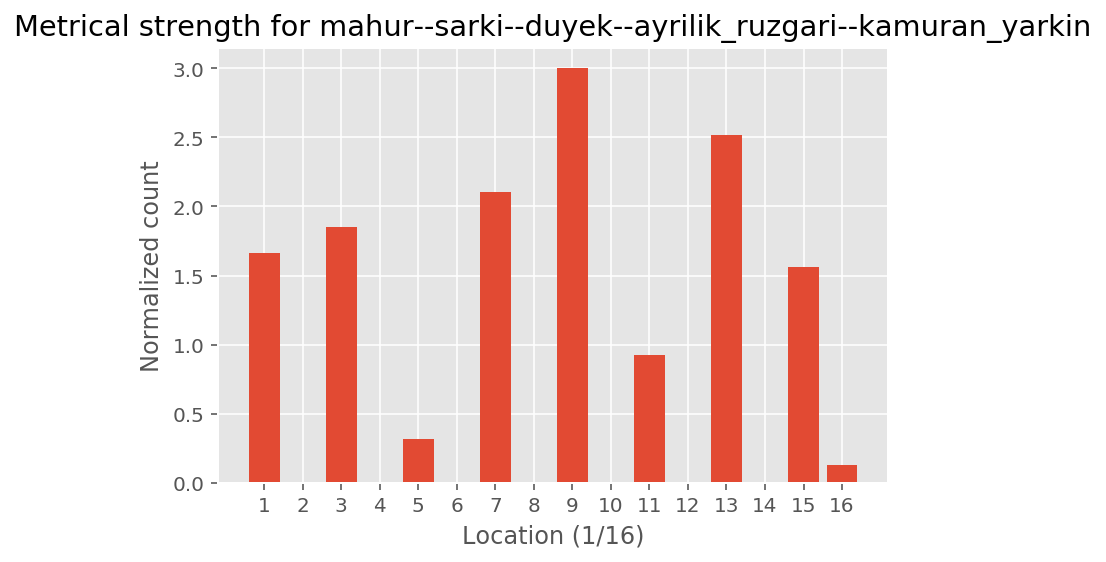

huzzam--sarki--aksak--yine_bir--serif_icli


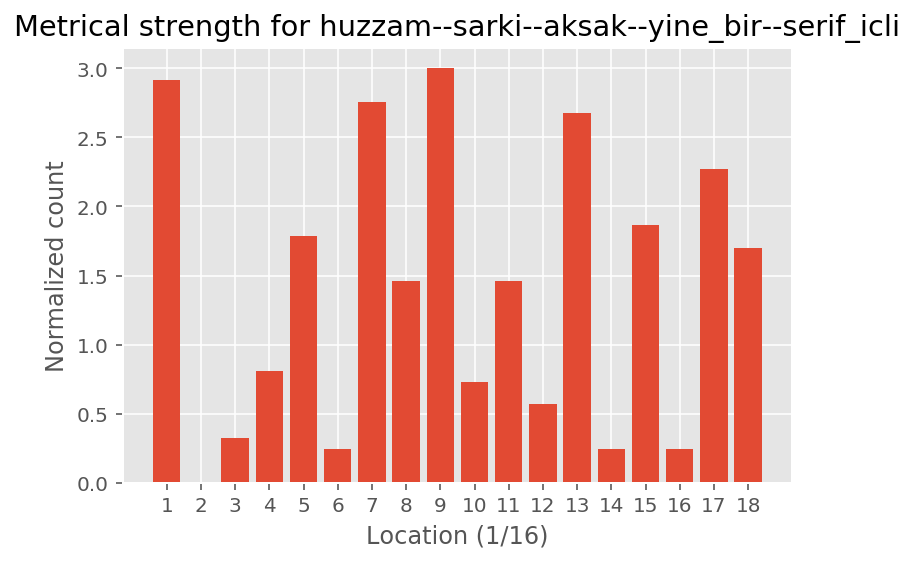

muhayyer--sarki--curcuna--batan_gun--sadettin_kaynak


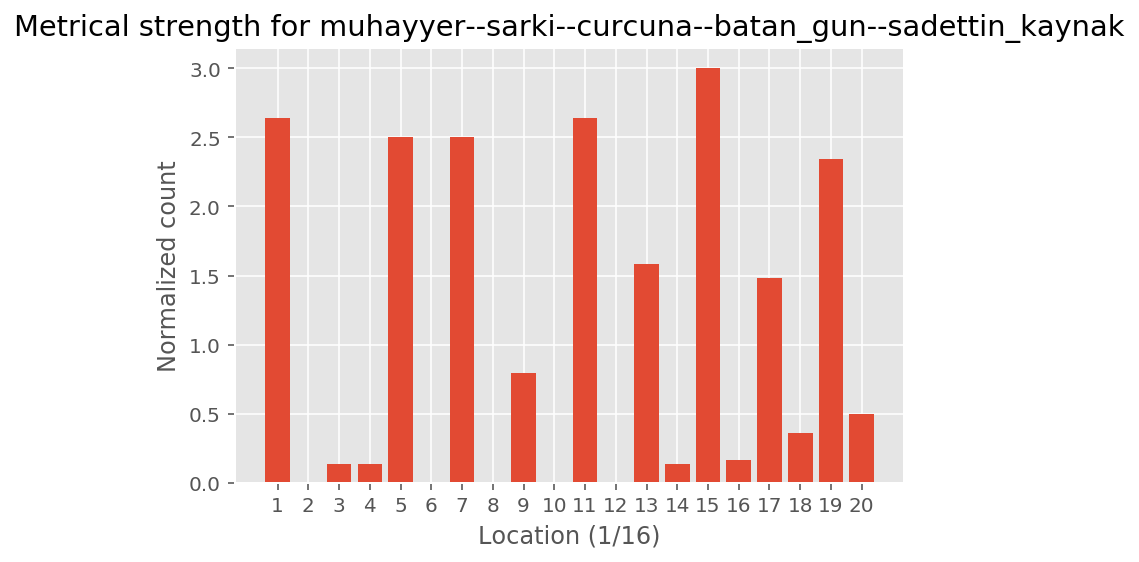

hicazkar--sarki--duyek--aglatip_kustureceksen--alaattin_sensoy


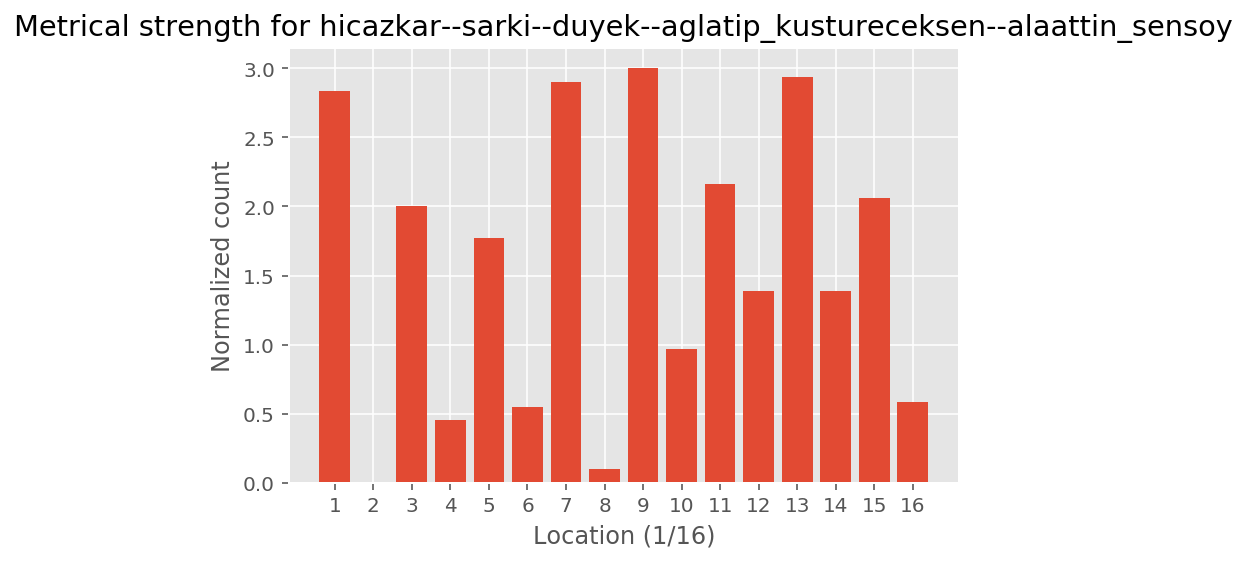

segah--sarki--duyek--gonul_bahcemizde--omer_sami_gupgup
hicaz--sarki--aksak--bir_an--omer_sami_gupgup
ussak--sarki--duyek--her_mevsim--semahat_ozdenses
hicazkar--etud--sofyan----ozer_ozel
nihavent--sarki--sofyan--gonlumle_oturdum--sekip_memduh_bey
huseyni--turku--aksak--a_fadimem--
huzzam--sarki--aksak--zamani_var_ki--klarnet_ibrahim_efendi
nihavent--fantezi--sofyan--mevsimlere_aldanirim--omer_sami_gupgup
hicazkar--kocekce--aksak--bekliyorum_salinarak--muallim_ismail_hakki_bey
muhayyer--etud--sofyan----hasan_esen
nihavent--etud--sofyan----ozer_ozel
mahur--tavsanca--aksak--nazar_etti--tanburi_mustafa_cavus
huzzam--seyir--duyek--1--erol_bingol
mahur--sarki--duyek--bu_son_sarkimda--muzaffer_ilkar
huzzam--sarki--aksak--ey_husn--ahmet_irsoy
rast--sarki--duyek--ne_sarkilarda--omer_dilek
ussak--sarki--aksak--gitti_de--dede_efendi
huzzam--aranagme--duyek--1--
muhayyer--turku--sofyan--el_vurup--tokat-zile
hicazkar--sarki--duyek--visali_yar--rakim_elkutlu
segah--turku--sofyan--keten_koynek--kirs

huzzam--sarki--sofyan--solgun_durma--munir_nurettin_selcuk
mahur--sarki--aksak--gonul_adli--dellalzade_haci_ismail_efendi
mahur--pesrev--duyek----gazi_giray_han
nihavent--sarki--duyek--su_guzeller--necip_mirkelamoglu
hicaz--sarki--curcuna--aksam_erdi--rahmi_bey
segah--sarki--aksak--gece_sessiz--gultekin_ceki
rast--sarki--curcuna--icime_hep--yildirim_gurses
hicazkar--sarki--duyek--yuzun_gullerden--sadettin_kaynak
huzzam--turku--curcuna--al_yesil--urfa
huseyni--turku--sofyan--yaylanin_cimenine--trabzon
mahur--tavsanca--aksak--aldi_aklim--ii_mahmud
segah--turku--aksak--boyda_bosun--istanbul
muhayyer--turku--sofyan--yandim_allah--sivas
hicazkar--sarki--duyek--harap_oldu--arif_sami_toker
mahur--sarki--aksak--alamam_dogrusu--serif_icli
rast--sarki--duyek--sensiz_kalan--irfan_ozbakir
segah--turku--curcuna--cayda_cira--elazig
hicazkar--sarki--duyek--birer_birer--omer_sami_gupgup
huseyni--turku--sofyan--hey_onbesli--tokat
nihavent--sarki--duyek--ak_duvaklar--omer_dilek
huzzam--sarki--aksak--ada

segah--turku--curcuna--bahcada_yesil--diyarbakir
mahur--sarki--sofyan--gordum_bugun--dede_efendi
segah--ornek_oz--duyek--1--ruhi_ayangil
rast--sarki--sofyan--ask_denilen--erol_sayan
muhayyer--sarki--curcuna--yetmez_mi_sana--rahmi_bey
segah--sarki--duyek--o_gece--omer_sami_gupgup
segah--turku--aksak--bir_gemim--ankara
huseyni--ornek_oz--duyek--1--ruhi_ayangil
hicaz--kalenderi--aksak--ebrulerinin_zahmi--ii_mahmud
nihavent--sarki--sofyan--ne_dert--sadettin_kaynak
hicaz--ilahi--sofyan--daglar_ile--kutbi_dede
muhayyer--sarki--duyek--cile_bulbulum--sadettin_kaynak
huseyni--turku--sofyan--sabahin_seher--
mahur--sarki--aksak--servinazi_seyret--rahmi_bey
huzzam--sarki--curcuna--guzel_gun--haci_arif_bey
ussak--turku--sofyan--kalenin_burcu_muyam--
nihavent--sarki--duyek--ellerim_boyle--sekip_ayhan_ozisik
nihavent--sarki--curcuna--vucud_ikliminin--haci_arif_bey
muhayyer--sarki--aksak--dilde_rast--serif_icli
mahur--sarki--curcuna--sakiz_hanim--bahadir_akkuzu
hicaz--zeybek--aksak----izmir
rast--sugu

In [87]:
import scipy.stats as sc

#correlations dictionary 
correlation = {
    "aksak": [0, 0, 0], 
    "sofyan": [0, 0, 0], 
    "duyek": [0, 0, 0], 
    "curcuna": [0, 0, 0]
}

# first key = makam, second key = usul
correlation_makam = {
    "hicaz": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]}, 
    "hicazkar": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]},
    "huseyni": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]},
    "huzzam": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]},
    "mahur": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]}, 
    "muhayyer": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]}, 
    "nihavent": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]}, 
    "rast": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]},
    "segah": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]},
    "ussak": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0], "curcuna": [0, 0, 0]}
}


for i in df_makam_bin_vals.index:
    sample = df_makam_bin_vals.loc[i]
    usul = sample['usul']
    makam = sample['makam']
    x = sample['bin_vals']
    file_path = sample['file_path'].split('-withoutKeySignature.xml')[0]
    print(file_path)
    
    plot_hist(x, makam, usul, i, file_path) 
    #correlation and p-value for each usul
    correlation[usul][0] = int(correlation[usul][0]) + 1
    correlation[usul][1] = correlation[usul][1] + sc.spearmanr(x, weights[usul])[0]
    correlation[usul][2] = correlation[usul][2] + sc.spearmanr(x, weights[usul])[1]
    
    #correlation and p-value for each usul considering the makam as well
    correlation_makam[makam][usul][0] += 1
    correlation_makam[makam][usul][1] += sc.spearmanr(x, weights[usul])[0]
    correlation_makam[makam][usul][2] += sc.spearmanr(x, weights[usul])[1]
        
print("Total number of makam processed: {}".format(i))

In [88]:
# Create DataFrame 
correlation_df = pd.DataFrame(correlation, index =['Total makam', 'correlation', 'p-value']) 
  
correlation_df.iloc[0].apply(int)
correlation_df

,aksak,sofyan,duyek,curcuna
Total makam,156.000000,129.000000,134.000000,67.000000
correlation,116.350183,66.764226,97.305141,52.308055
p-value,1.309801,12.756624,1.351413,0.007665


In [89]:
for usul in usul_considered:
    #average correlations per usul
    print("Correlation for {} usul: {}, p-value: {}".format(usul, correlation[usul][1]/correlation[usul][0], 
          correlation[usul][2]/correlation[usul][0]))
    

Correlation for aksak usul: 0.7458345090355403, p-value: 0.008396162270744313
Correlation for sofyan usul: 0.5175521401380984, p-value: 0.0988885603112329
Correlation for duyek usul: 0.72615776736694, p-value: 0.010085168848546065
Correlation for curcuna usul: 0.7807172346217971, p-value: 0.00011440739158565087


In [90]:
#todo: make a data frame as well 
correlation_makam_avg = {
    "hicaz": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "hicazkar": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "huseyni": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "huzzam": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "mahur": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]},  
    "muhayyer": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]},  
    "nihavent": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "rast": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "segah": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}, 
    "ussak": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0], "curcuna": [0, 0]}
}

#change name of this
total = 0
for makam, value in correlation_makam.items():
    for usul, value1 in value.items():
        avg_correlation = value1[1]/value1[0]
        avg_pval = value1[2]/value1[0]
        # update our dict
        correlation_makam_avg[makam][usul][0] = avg_correlation
        correlation_makam_avg[makam][usul][1] = avg_pval
        total += value1[0]

# assert we have considered all makams 
print("Total number of makam processed: {}".format(total))  

Total number of makam processed: 486


In [91]:
# Create DataFrame 
correlation_df_makams = pd.DataFrame(correlation_makam_avg) 
for makam in makam_considered:
    print('Makam:', makam)
    total_correlation = 0
    total_pval = 0
    usul_count = 0
    for usul in usul_considered:
        correlation_val = correlation_df_makams[makam][usul][0]
        p_val = correlation_df_makams[makam][usul][1]
        total_correlation += correlation_val
        total_pval += p_val
        usul_count += 1   
        # output stats
        print("Correlation for {} usul: {}, p-value: {}".format(usul, correlation_val, p_val))
    print('Average correlation for {} makam: {}, p-value: {}\n'.format(makam, total_correlation/usul_count, 
                                                                         total_pval/usul_count))

Makam: hicaz
Correlation for aksak usul: 0.7320392192787798, p-value: 0.006164838354526331
Correlation for sofyan usul: 0.520049566101943, p-value: 0.08614469914858622
Correlation for duyek usul: 0.7170030359327098, p-value: 0.022556871402976287
Correlation for curcuna usul: 0.7690186699385412, p-value: 0.00011282880494285053
Average correlation for hicaz makam: 0.6845276228129934, p-value: 0.02874480942775792

Makam: hicazkar
Correlation for aksak usul: 0.6974127996040231, p-value: 0.028937647370021802
Correlation for sofyan usul: 0.4917772588792948, p-value: 0.09057781584198354
Correlation for duyek usul: 0.7385577733342558, p-value: 0.0031734748646174613
Correlation for curcuna usul: 0.7736287914916942, p-value: 0.00015489280454099948
Average correlation for hicazkar makam: 0.675344155827317, p-value: 0.03071095772029095

Makam: huseyni
Correlation for aksak usul: 0.781527137349743, p-value: 0.008631947578610358
Correlation for sofyan usul: 0.5130985017395008, p-value: 0.12628736193